In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix as cm, classification_report
import tensorflow as tf
%matplotlib inline

In [2]:
df = pd.read_csv("Data_for_UCI_named.csv")

In [3]:
df.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
df.nunique()

tau1     10000
tau2     10000
tau3     10000
tau4     10000
p1       10000
p2       10000
p3       10000
p4       10000
g1       10000
g2       10000
g3       10000
g4       10000
stab     10000
stabf        2
dtype: int64

In [6]:
#checcking the summary statistics of the dataset
df.describe()

tau1          tau2          tau3          tau4            p1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       5.250000      5.250001      5.250004      5.249997      3.750000   
std        2.742548      2.742549      2.742549      2.742556      0.752160   
min        0.500793      0.500141      0.500788      0.500473      1.582590   
25%        2.874892      2.875140      2.875522      2.874950      3.218300   
50%        5.250004      5.249981      5.249979      5.249734      3.751025   
75%        7.624690      7.624893      7.624948      7.624838      4.282420   
max        9.999469      9.999837      9.999450      9.999443      5.864418   

                 p2            p3            p4            g1            g2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -1.250000     -1.250000     -1.250000      0.525000      0.525000   
std        0.433035      0.433035      0.433035      0.274256      0.274255   
min       -1.999891     -1.999945     -1.999926      0.050009      0.050053   
25%       -1.624901     -1.625025     -1.624960      0.287521      0.287552   
50%       -1.249966     -1.249974     -1.250007      0.525009      0.525003   
75%       -0.874977     -0.875043     -0.875065      0.762435      0.762490   
max       -0.500108     -0.500072     -0.500025      0.999937      0.999944   

                 g3            g4          stab  
count  10000.000000  10000.000000  10000.000000  
mean       0.525000      0.525000      0.015731  
std        0.274255      0.274255      0.036919  
min        0.050054      0.050028     -0.080760  
25%        0.287514      0.287494     -0.015557  
50%        0.525015      0.525002      0.017142  
75%        0.762440      0.762433      0.044878  
max        0.999982      0.999930      0.109403

In [7]:
df.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable

In [9]:
#checking for outliers using boxplot
plt.figure(figsize=(12, 4))
plt.boxplot([df['tau1'], df['tau2'], df['tau3'], df['tau4'], df['p1'], df['p2'], df['p3'], df['p4'], df['g1'], df['g2'], df['g3'], df['g4'],df['Class']] )
plt.xticks([1, 2,3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4', 'Class'] )
plt.show()

KeyError: 'Class'

<Figure size 864x288 with 0 Axes>

In [10]:
df.loc[df['stab'] > 0, 'Class'] = 1
df.loc[df['stab'] <= 0, 'Class'] = 0

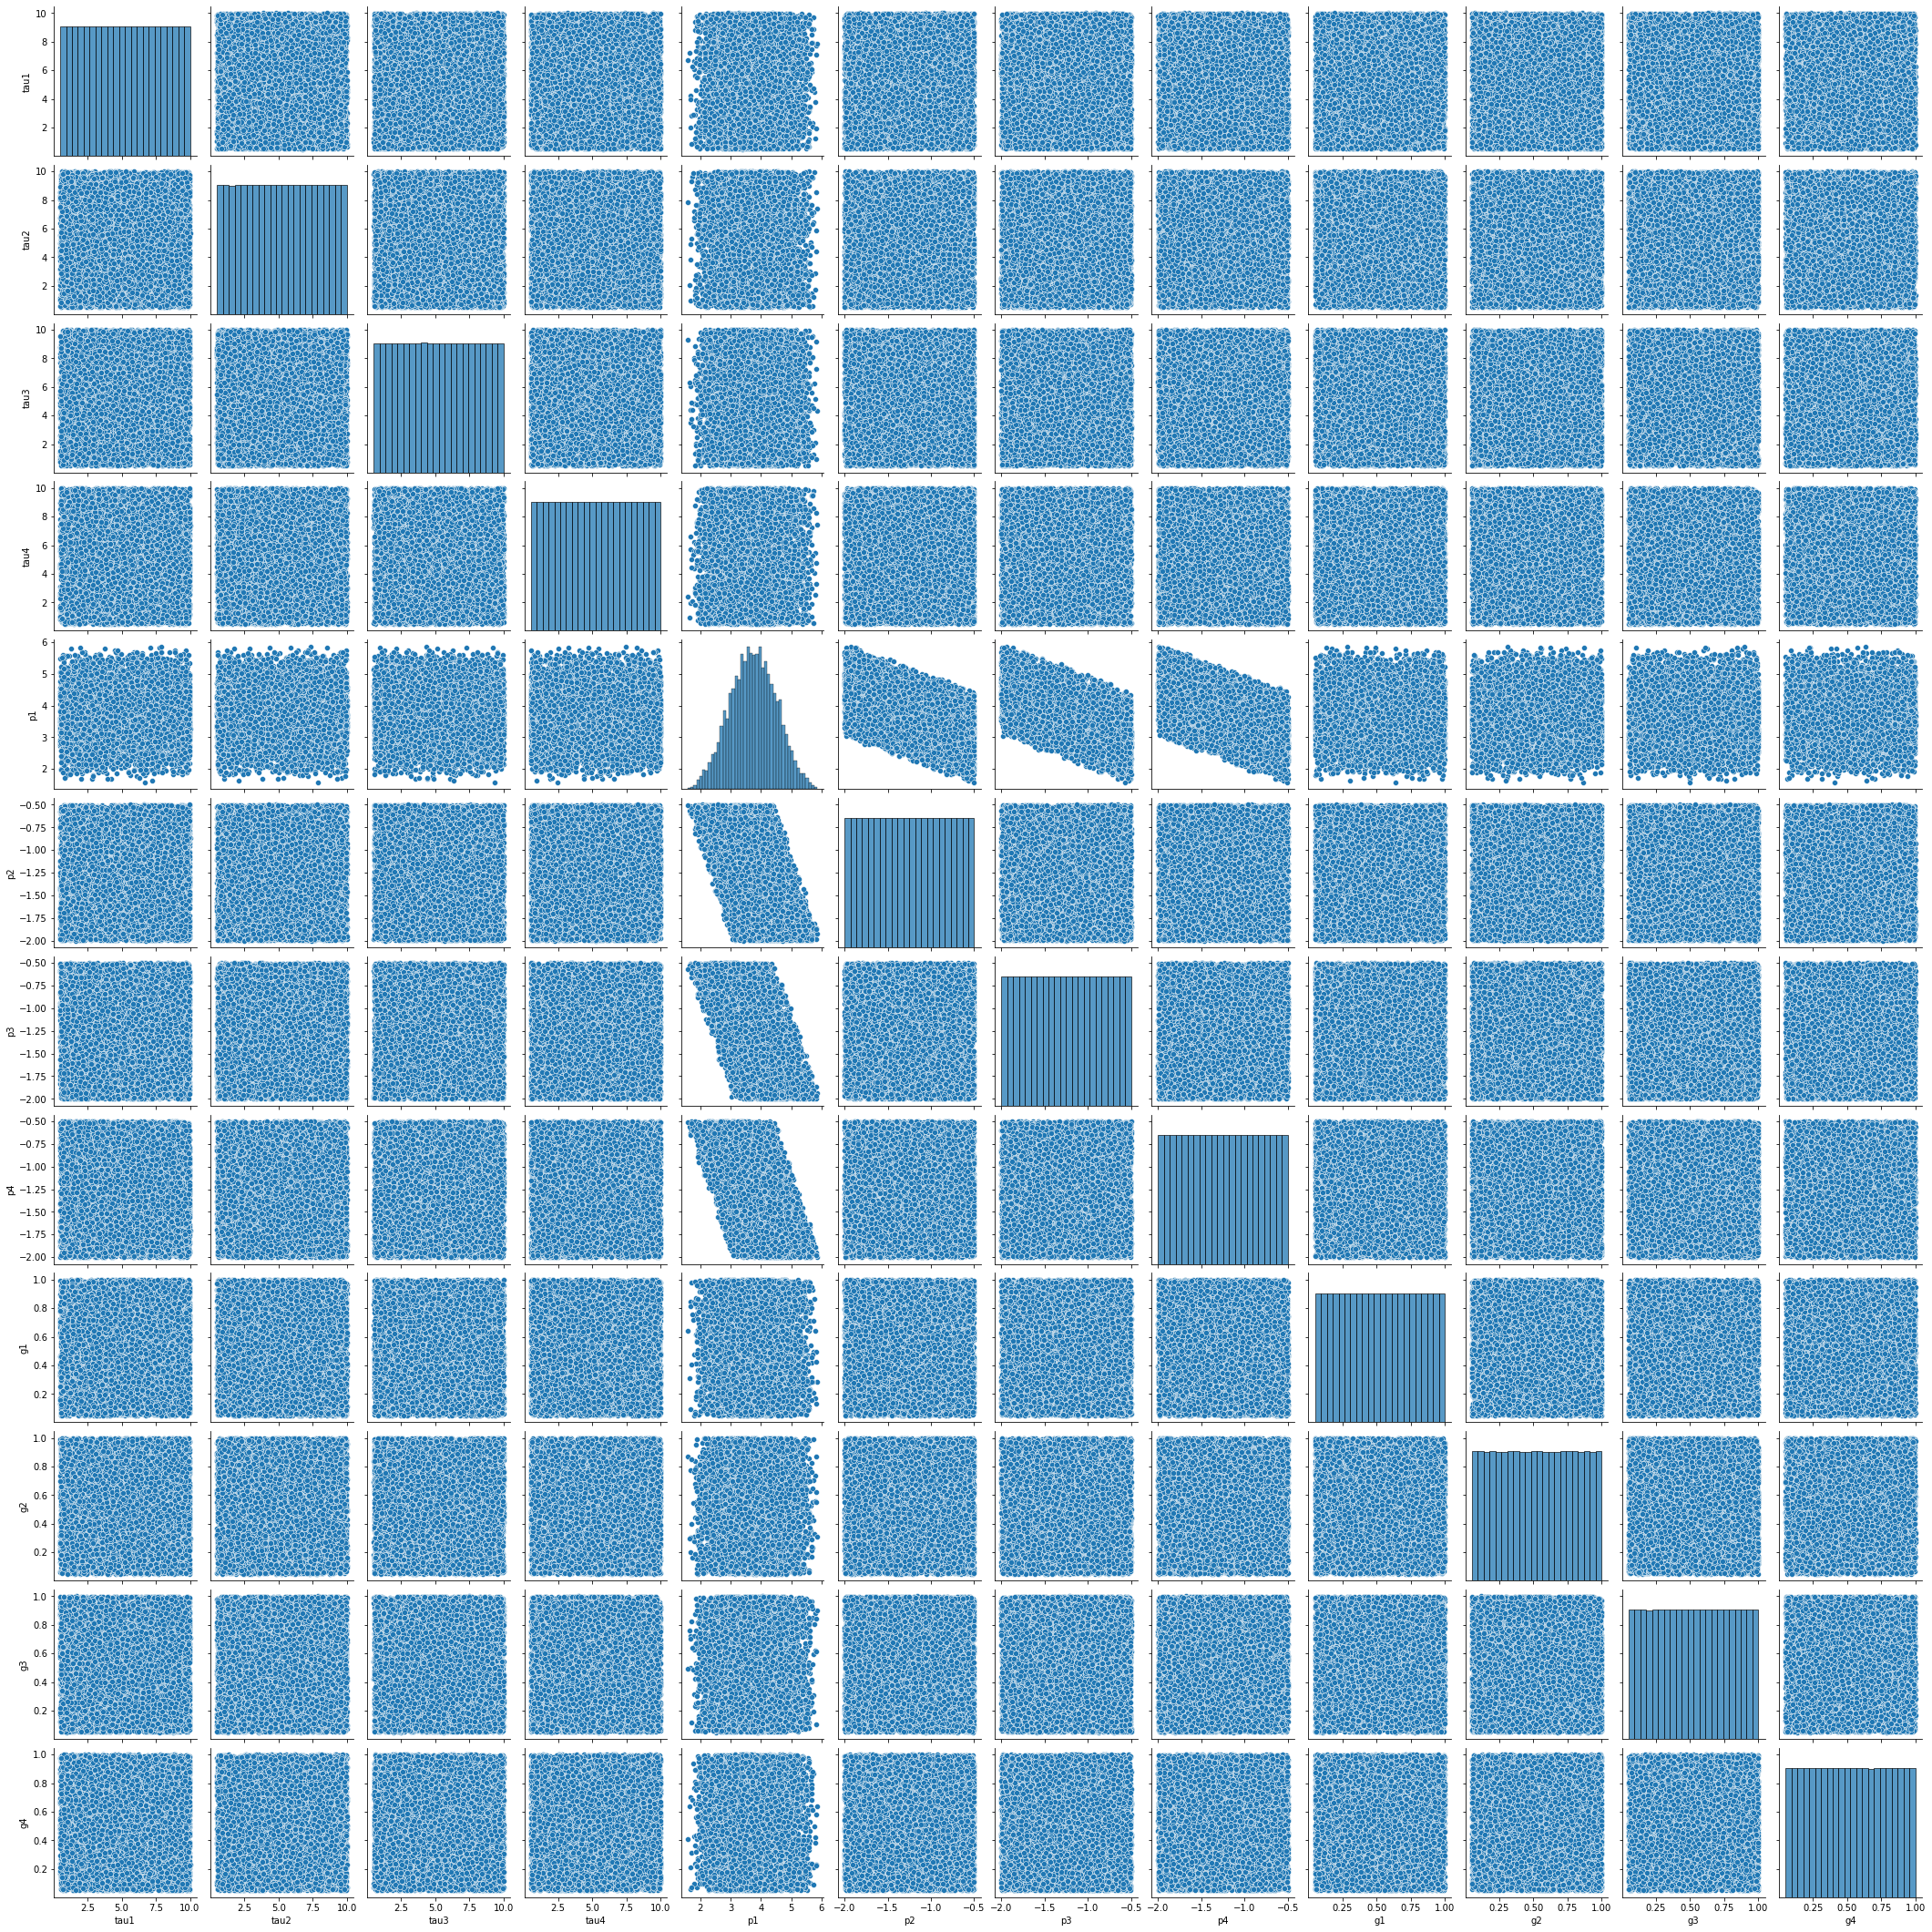

In [13]:
sns.pairplot(df.iloc[:,0:12])

In [1568]:
#determining class feature and predictors
X = df.iloc[:,:12]
y = df.iloc[:,14]

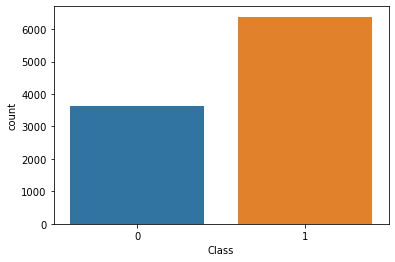

In [1569]:
#visualiing to see if the class is balanced
y.value_counts()
sns.countplot(x=y);

In [1572]:
#splitting dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify=y, random_state = 99)

<AxesSubplot:xlabel='Class', ylabel='count'>

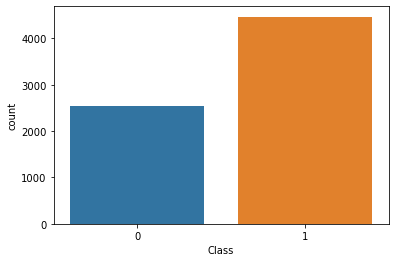

In [1576]:
sns.countplot(x=y_train)

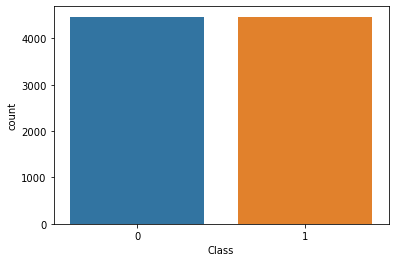

In [1577]:
#balancing the dataset using RandomOverSampler
resampler = RandomOverSampler(random_state=0)
X_train, y_train = resampler.fit_resample(X_train, y_train)
sns.countplot(x=y_train);

In [1541]:
#scaling the features
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [1542]:
#building the neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12,activation='relu',input_shape=(12,)))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [1543]:
#compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_218 (Dense)           (None, 12)                156       
                                                                 
 dense_219 (Dense)           (None, 32)                416       
                                                                 
 dense_220 (Dense)           (None, 16)                528       
                                                                 
 dense_221 (Dense)           (None, 8)                 136       
                                                                 
 dense_222 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,245
Trainable params: 1,245
Non-trainable params: 0
_________________________________________________________________


In [1544]:
#training and fitting the model
history = model.fit(X_train_s, y_train, batch_size = 16, epochs= 100, verbose=2,  validation_split=0.2)

Epoch 1/100
447/447 - 2s - loss: 0.4878 - accuracy: 0.7640 - val_loss: 0.4727 - val_accuracy: 0.7599 - 2s/epoch - 4ms/step
Epoch 2/100
447/447 - 1s - loss: 0.3297 - accuracy: 0.8530 - val_loss: 0.3821 - val_accuracy: 0.8260 - 961ms/epoch - 2ms/step
Epoch 3/100
447/447 - 1s - loss: 0.2651 - accuracy: 0.8836 - val_loss: 0.2431 - val_accuracy: 0.9088 - 1s/epoch - 2ms/step
Epoch 4/100
447/447 - 1s - loss: 0.2293 - accuracy: 0.9037 - val_loss: 0.3473 - val_accuracy: 0.8450 - 1s/epoch - 2ms/step
Epoch 5/100
447/447 - 1s - loss: 0.2043 - accuracy: 0.9125 - val_loss: 0.2122 - val_accuracy: 0.9149 - 1s/epoch - 2ms/step
Epoch 6/100
447/447 - 1s - loss: 0.1887 - accuracy: 0.9218 - val_loss: 0.2468 - val_accuracy: 0.8954 - 956ms/epoch - 2ms/step
Epoch 7/100
447/447 - 1s - loss: 0.1771 - accuracy: 0.9246 - val_loss: 0.2258 - val_accuracy: 0.9088 - 873ms/epoch - 2ms/step
Epoch 8/100
447/447 - 1s - loss: 0.1648 - accuracy: 0.9307 - val_loss: 0.1534 - val_accuracy: 0.9407 - 866ms/epoch - 2ms/step
Epoc

Epoch 66/100
447/447 - 1s - loss: 0.0512 - accuracy: 0.9800 - val_loss: 0.0857 - val_accuracy: 0.9636 - 1s/epoch - 2ms/step
Epoch 67/100
447/447 - 1s - loss: 0.0510 - accuracy: 0.9814 - val_loss: 0.0377 - val_accuracy: 0.9838 - 925ms/epoch - 2ms/step
Epoch 68/100
447/447 - 1s - loss: 0.0544 - accuracy: 0.9768 - val_loss: 0.0757 - val_accuracy: 0.9715 - 833ms/epoch - 2ms/step
Epoch 69/100
447/447 - 1s - loss: 0.0551 - accuracy: 0.9768 - val_loss: 0.0575 - val_accuracy: 0.9799 - 786ms/epoch - 2ms/step
Epoch 70/100
447/447 - 1s - loss: 0.0494 - accuracy: 0.9807 - val_loss: 0.0253 - val_accuracy: 0.9916 - 761ms/epoch - 2ms/step
Epoch 71/100
447/447 - 1s - loss: 0.0499 - accuracy: 0.9787 - val_loss: 0.0520 - val_accuracy: 0.9771 - 781ms/epoch - 2ms/step
Epoch 72/100
447/447 - 1s - loss: 0.0469 - accuracy: 0.9814 - val_loss: 0.0330 - val_accuracy: 0.9871 - 744ms/epoch - 2ms/step
Epoch 73/100
447/447 - 1s - loss: 0.0534 - accuracy: 0.9784 - val_loss: 0.0146 - val_accuracy: 0.9966 - 733ms/epoc

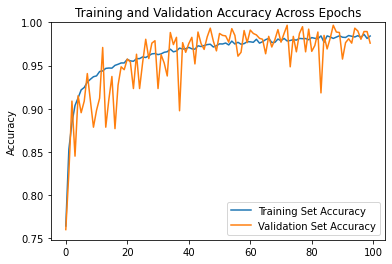

In [1545]:
#plotting the accuracy
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend();

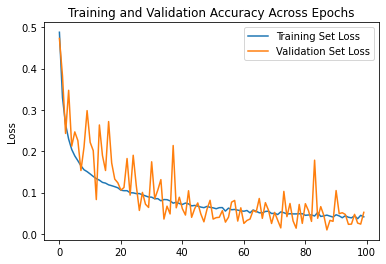

In [1546]:
#plotting the loss function
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [1548]:
#using the model to predict
y_pred = model.predict(X_test_s)
y_pred = (y_pred > 0.5)

94/94 [==============================] - 0s 1ms/step


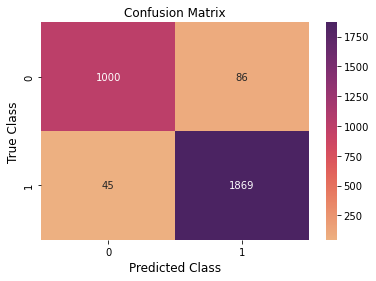

In [1549]:
#evaluating model performance
confusion = cm(y_test,y_pred)
ax = sns.heatmap(confusion, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [1550]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cmatrix=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix')
print(cmatrix,'\n\n')
print('------------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.96


Confusion Matrix
[[1000   86]
 [  45 1869]] 


------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1086
           1       0.96      0.98      0.97      1914

    accuracy                           0.96      3000
   macro avg       0.96      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000

